# DataFrame: Two-dimensional. An entire table.

In [1]:
# importing libraries
import pandas as pd
import numpy as np

In [ ]:
# clean data:
    # null values, duplicates, wrong values
# get descriptive stats
# study correlation between variables

In [2]:
# 3 ways to create a DataFrame:

# way 1: call pd.DataFrame() and pass a dictionary as an argument(input). a Key will be one column name and the corresponding value will be a whole list representing the column entries
# Example:
dict1 = {
    'Name':['cat', 'dog', 'bird', 'mouse'],
    'Initial':['c', 'd', 'b', 'm'],
    'Weight(KG)':[4.5, 20, 0.054, 2.5]
}
pets_df = pd.DataFrame(dict1) 





In [4]:
# way 2: call pd.DataFrame() and pass as arguments(inputs):
#   1) a list of lists where each list represent a complete row in the DataFrame
#   2) a list that contains the column names


list1 = [
    ['cat', 'c', '4.5'],
    ['dog', 'd', '20'],
    ['bird', 'b', '0.054'],
    ['mouse', 'm', '2.5']
]
df_columns = ['Name', 'Initial', 'Weight(KG)']
pets2 = pd.DataFrame(list1, columns=df_columns)


In [5]:
# way 3: read table data from an external file
file_name = 'resources/grades_data.csv'
#use the read_csv() function from pandas to read the data and store in a DataFrame 
grades_df = pd.read_csv(file_name)


# DataFrame attributes(data fields)

In [5]:
# What is the data type of each column
grades_df.dtypes

# print out the DataFrame index
grades_df.index

# get the number of dimensions(axes) in the DataFrame
grades_df.ndim

# get the axes of the DataFrame(remember: DataFrames are Two-dimensional so there are two axes)
grades_df.axes


# get the name of the columns
grades_df.columns


# # get the shape of the DataFrame(number of rows & number of columns)
grades_df.shape

# get the number of elements in the DataFrame
grades_df.size

grades_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   student  32 non-null     object
 1   subject  31 non-null     object
 2   grade    32 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 896.0+ bytes


# DataFrame methods(functions)

In [7]:
# Get the first 7 rows in the DataFrame using the function 'head()'
grades_df.head(7)

# Get the last 4 rows in the series using the function 'tail()'
grades_df.tail(4)


,student,subject,grade
28,Laura,art,97
29,James,math,92
30,Michael,art,88
31,Michael,biology,89


In [8]:

# Get the 'student' column from the DataFrame. What is the data type of the returned object?
grades_df['student']

# Get the 'grades' column from the DataFrame and store in a variable. What is the data type of the returned object?
temp = grades_df['grade']
type(temp)

pandas.core.series.Series

In [16]:
# Get the count of non-null values using the function 'count()'
grades_df.count()

# # check which rows are duplicated, then count them up
duplicates = grades_df.duplicated()
duplicates_sum = duplicates.sum()

# drop the duplicated rows then count the rows to make sure they've been deleted.
grades_df = grades_df.drop_duplicates()
grades_df.count()

student    30
subject    29
grade      30
dtype: int64

In [21]:
# Does any of the columns contain null values(use the isna() function)? If yes:

# 1) isolate the column and check its entries
grades_df.isnull().sum()
grades_df['subject']
# 2) use the loc attribute to isolate the grades of the student with the missing value
grades_df.loc[grades_df['student'] == 'David']

# 3) can you check what the value of null cell should have been? If yes, fill that cell with the correct value using the loc attribute, and then verify if it was filled correctly.
# grades_df['subject'].unique()
grades_df.loc[21, 'subject'] = 'art'
grades_df.loc[grades_df['student'] == 'David']

c:\Users\batta\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,student,subject,grade
6,David,biology,92
13,David,math,84
21,David,art,94


In [20]:
grades_df.loc[grades_df['student'] == 'David']



,student,subject,grade
6,David,biology,92
13,David,math,84
21,David,NaN,94


In [11]:
# check to see if any grades are wrong, i.e. less than 0 or greater than 100. Correct the cell values if possible
grades_df.loc[(grades_df['grade'] <0) | (grades_df['grade'] >100), 'grade']

grades_df.loc[5, 'grade'] = 85
grades_df.loc[(grades_df['grade'] <0) | (grades_df['grade'] >100), 'grade'].count()

0

In [21]:
# print out the student names without replication.
students = grades_df['student'].unique()
students_count = len(students)
students_count

# print out the student subjects without replication.
subjects = grades_df['subject'].unique()
subjects_count = len(subjects)
subjects_count


3

In [69]:
# group the grades by subject and get the lowest, highest, and the average grade.
min_grades_by_subject= grades_df.groupby('subject').min()['grade']
max_grades_by_subject= grades_df.groupby('subject').max()['grade']
average_grades_by_subject =grades_df.groupby('subject').mean()['grade']

subject_aggregates = pd.DataFrame({'lowest_grade':min_grades_by_subject, 'highest_grade':max_grades_by_subject, "average_grade":average_grades_by_subject})
subject_aggregates

,lowest_grade,highest_grade,GPA
subject,,,
art,85,97,90.2
biology,75,99,86.5
math,63,93,80.2


In [71]:
# group the grades by student and get the lowest grade, highest grade, and the GPA.
min_grades_by_student= grades_df.groupby('student').min()['grade']
max_gradesby_student= grades_df.groupby('student').max()['grade']
GPAs =grades_df.groupby('student').mean()['grade']

student_aggregates = pd.DataFrame({'lowest_grade':min_grades_by_student, 'highest_grade':max_gradesby_student, "GPA":GPAs})
student_aggregates

,lowest_grade,highest_grade,GPA
student,,,
Daniel,75,92,86.000000
David,84,94,90.000000
Elizabeth,75,86,82.000000
James,85,98,91.666667
Laura,67,97,85.666667
Linda,66,99,83.666667
Michael,88,93,90.000000
Steven,77,88,83.666667
Susan,63,94,78.333333


<AxesSubplot:xlabel='subject'>

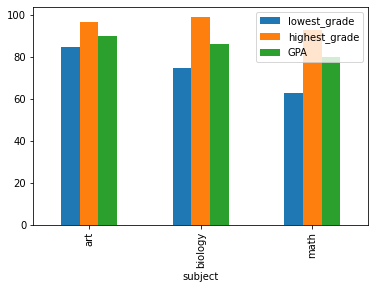

In [89]:
# create a chart using the 'subject_aggregates' DataFrame, and set the chart kind to 'bar'
subject_aggregates.plot(kind="bar")

In [105]:
# study the grade correlation between each pair of subjects
math_grades = grades_df[grades_df['subject'] == 'math']['grade'].reset_index(drop=True)
biology_grades = grades_df[grades_df['subject'] == 'biology']['grade'].reset_index(drop=True)
art_grades = grades_df[grades_df['subject'] == 'art']['grade'].reset_index(drop=True)
math_and_biology = math_grades.corr(biology_grades)
math_and_art = math_grades.corr(art_grades)
biology_and_art = biology_grades.corr(art_grades)
correlation_df = pd.DataFrame([{'math_and_biology':math_and_biology,'math_and_art':math_and_art, 'biology_and_art':biology_and_art}])
correlation_df

,math_and_biology,math_and_art,biology_and_art
0,-0.09206,0.038038,-0.628661
